Initial Fluid Height :0.3000 m


/var/folders/fg/w2t7p9sx1_s43rj6b6h5mdqw0000gn/T/ipykernel_12778/220771835.py:101: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpio" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Initial Value.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg


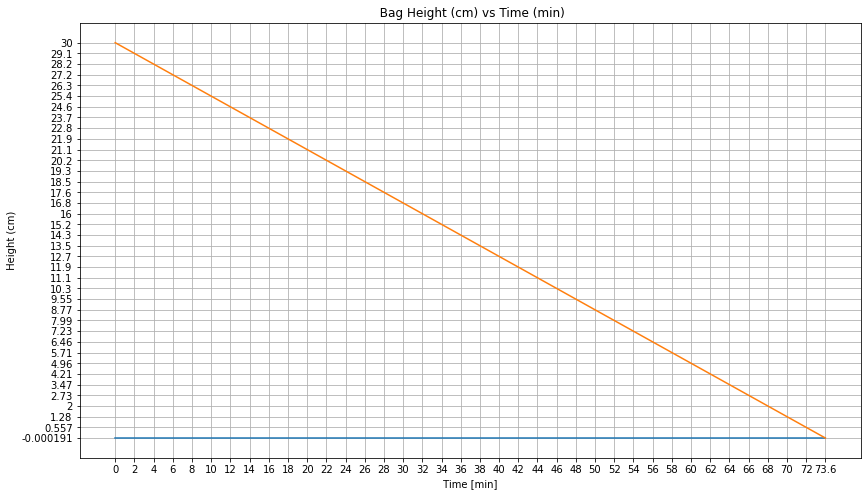

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci 
import pandas as pd 
import math 

# set up constants 
mu = 1.0e-3 #kg/m s viscocity 
rho = 1000.0 #Kg/m^3 fluid density 
d_tube = 0.953E-3 # inner diameter of the tube 
l_tube = 2.000 #Length of the tubing 
tc_area = np.pi*(100.0*d_tube/2)**2 #Ac tube crossectional area 
p1 = 101325.0 #Atmospheric pressure in pascals 
p2 = 102391.6 #Venous pressure in pascals 
grav = 9.81 # gravity in m/s^2 
sa = (500.0/30.0)*(1/100.0)**2 #bag crossectional area 
vtot = 500.0 # total volume of the IV bag 
icount = 0 
h0 = 0.3 #initial height of the fluid in the IV bag in meters 
H = 1.0 #height of the IV bag relative to the patients arm 
h1 = 2.0 #initialize the the equation 

t = 0 # set up time values 
dt = .05 #set up time steps 

sigfigs = 4 #set sig figs for the problem 

epi = 0.000000001 #dictate a tolerance 
tol = 20 #define an initial tol 

x = h0 

def v2(x): #define a function to solve for velocity 
    a = 1.0 
    b = (32.0*mu*l_tube/(rho*d_tube**2))
    c = -(grav*(x+H))
    vel = (-b + math.sqrt(b**2-4.0*a*c))/(2.0*a)
    return vel 

vmax = v2(h0)*60.0*100.0 #solve max velocity 
vmin = v2(0.0)*60.0*100  #solve min velocity 

# print(vmax)
# print(vmin)
# print(tc_area)

qmax = vmax*tc_area #solve for q max
qmin = vmin*tc_area #solve for q min 

tmin = vtot/qmax #solve for t min 
tmax = vtot/qmin #solve for t max 

#creating a final table 

L_time = ['%.*g'%(sigfigs,tmin),'%.*g'%(sigfigs,tmax)] #format time output

#create lists for plotting every minute 

L_timep =['%.*g'%(sigfigs-1,t/60.0)]
L_heightp =['%.*g'%(sigfigs-1,h0*100.0)]

# print("Minimum time: %f " % tmin )
# print(f'Maximum time :{tmax:.4f} minutes')

print(f'Initial Fluid Height :{h0:.4f} m')

ptime = 0 #initialize time 
jcount = 0 #initialize count

while (tol>epi): #Euler's Method 
    icount = icount + 1 #initiate icount
    jcount = jcount + 1 #initiate icount
    dd = -(v2(h0)*np.pi*(d_tube/2)**2)/sa #derivitive of function
    h1 = h0 + dt*dd #establish new height 
    
    tol = abs(h1-h0)/h1 #calculate tolerance 
    h0 = h1 ##establish new height
    time = icount*dt #add to count
    ptime = jcount*dt #add to count
    if (ptime == 120.0): #set up if statement 
        L_timep.append('%.*g'%(sigfigs-1,time/60)) #add to time list 
        #print(time/60)
        L_heightp.append('%.*g'%(sigfigs-1,h0*100.0)) #add to height list 
        jcount = 0 
        

L_timep.append('%.*g'%(sigfigs-1,time/60)) #append time list 
L_heightp.append('%.*g'%(sigfigs-1,h0*100.0)) #append height list 
L_time.append('%.*g'%(sigfigs-1,time/60))

L_rheightp = list(reversed(L_heightp)) #reverse height list 
L_rtimep = list(reversed(L_timep)) #reverse time list 
x_ax = np.linspace(0,74,10) #set up x axis 
fig = plt.figure(figsize = (14,8)) #create figure size 
plt.plot(L_timep,np.zeros(len(L_timep))) #plot zero line 
plt.plot(L_rtimep,L_rheightp) #plot reversed time and height values 
plt.grid(True) #add grid 
plt.title("  Bag Height (cm) vs Time (min) ") #create title 
plt.xlabel(' Time [min] ') #label x axis 
plt.ylabel(' Height (cm) ') #label y axis 
fig.savefig('Initial Value.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg
#print(x_ax)
#print(np.zeros(len(x_ax)))

df = pd.DataFrame({" Actual Time [min] ":L_timep, #create a dataframe of values 

                   " Height [cm] ": L_heightp,})

                   
                   
df1 = pd.DataFrame({"Min Time [min]": tmin,  #create second dataframe of values 
                  "Max Time [min]": tmax,
                  "Max Flow Rate[m^3/s]": qmax,
                  "Min Flow Rate [m^3/s]": qmin}, index= [0])
list_of_dfs = [df,df1] #compiled the two data frames 

with open('Initial Value Problem.csv','w',) as f: #write csv file 

    df.to_csv('Initial Value Problem.csv', mode='w', index=False, header=True) #write dataframe 1 to the csv file 

    f.write("\n") #writes a carriage reture after each data frame to create space 

    df1.to_csv('Initial Value Problem.csv',mode='a', index=False, header=True) #write dataframe 2 to the csv file 

#print(df)
#print(df1)
#print(L_timep)
#print(L_heightp)



